In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ML_LAB/diabetes.csv")
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [ ]:
data.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
dataset=data.values
x=dataset[:,0:8]
y=dataset[:,8]
print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [ ]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(x)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
from keras.utils import np_utils
encoded_y=np_utils.to_categorical(y)
encoded_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
x_training,x_testing,y_training,y_testing=train_test_split(X_scale,encoded_y,test_size=0.2,random_state=10)
x_training,x_valid,y_training,y_valid=train_test_split(x_training,y_training,test_size=0.2,random_state=10)
print(len(x_training))
print(len(x_testing))
print(len(x_valid))

491
154
123


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#Creating the model
model=Sequential()
model.add(Dense(24,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(12,activation='tanh'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 20)                500       
                                                                 
 dense_2 (Dense)             (None, 12)                252       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,090
Trainable params: 1,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
opt=optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
hist=model.fit(x_training,y_training,batch_size=4,epochs=750,validation_data=(x_valid,y_valid))

Epoch 1/750
123/123 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7658 - val_loss: 0.4560 - val_accuracy: 0.8049
Epoch 2/750
123/123 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7943 - val_loss: 0.4506 - val_accuracy: 0.8130
Epoch 3/750
123/123 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7637 - val_loss: 0.4660 - val_accuracy: 0.8049
Epoch 4/750
123/123 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7739 - val_loss: 0.4434 - val_accuracy: 0.7967
Epoch 5/750
123/123 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7719 - val_loss: 0.4556 - val_accuracy: 0.8130
Epoch 6/750
123/123 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7637 - val_loss: 0.4729 - val_accuracy: 0.7724
Epoch 7/750
123/123 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7760 - val_loss: 0.4546 - val_accuracy: 0.8130

<Figure size 432x288 with 0 Axes>

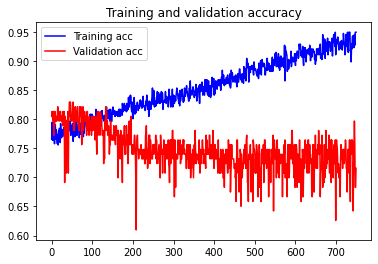

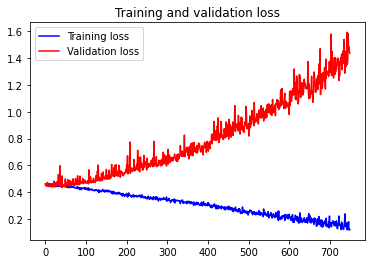

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('custom_trainvalacc.png')
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
#plt.show()
plt.savefig('custom_trainvalloss.png')
plt.figure()

In [ ]:
res=model.evaluate(x_testing,y_testing)

5/5 [==============================] - 0s 3ms/step - loss: 1.3596 - accuracy: 0.7273


In [ ]:
test=x_testing[0]
y_act=y_testing[0]
result=model.predict(test.reshape(1,8))
result

array([[0.19082671, 0.8091733 ]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.round(result)
print("Actual:"+str(y_act))
print("predicted:"+str(y_pred))

Actual:[1. 0.]
predicted:[[0. 1.]]
